<a href="https://colab.research.google.com/github/RajarshiRay25/FINLAND---Network-Pharmacology-Pipelines-and-Methodologies/blob/main/FINLAND_Cytokine_Inhibitors_ML_QSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBRARIES FOR ANALYSIS AND UPLOAD DATASET FOR INITIAL PROCESSING

---

 * Input File : CSV file with CHEMBL ID, chemical SMILES,Standard type(Bioactivity type) , Standard Value(Bioactivity Value) , Units , Relation.

 * Columns required : CHEMBL ID , SMILES , Standard Value.
 * Based on Standard Values, we classify the potency into active,inactive and intermediate.
 * RDkit for basic Lipinski Analysis and Statistical Significance.[Not Required if PADEL descriptors are considered].
 * IC50 --> pIC50 for standardisation.
 * Remove Intermediate.
 * Molecular Descriptor Fingerprint analysis with Padel.
 * Classification - Active vs Inactive Depiction.
    * Metrics : AUC-ROC analysis, Best Features , Correlation heatmap , Applicability Domain, Confusion Matrix

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import dataset

df_chemicals = pd.read_csv('./TNF Compounds ML.csv')
df_chemicals.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,IC50,'=',5600.0,nM
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,IC50,'=',6000.0,nM
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,IC50,'=',100000.0,nM
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,IC50,'=',55000.0,nM
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,IC50,'=',900.0,nM


In [ ]:
# Process the dataset : Remove the insignificant columns

df_chemicals = df_chemicals[['Molecule ChEMBL ID' , 'Smiles' , 'Standard Value']]
df_chemicals.head()

,Molecule ChEMBL ID,Smiles,Standard Value
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,5600.0
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,6000.0
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,100000.0
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,55000.0
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,900.0


In [ ]:
# Include Biological state of compounds based on potency value

activity_state = []

for i in df_chemicals['Standard Value']:
  if float(i) >= 10000:
    activity_state.append('Inactive')
  elif float(i) <= 1000:
    activity_state.append('Active')
  else:
    activity_state.append('Intermediate')


In [ ]:
df_chemicals['Bioactvity Class'] = activity_state

In [ ]:
df_chemicals.head()

,Molecule ChEMBL ID,Smiles,Standard Value,Bioactvity Class
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,5600.0,Intermediate
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,6000.0,Intermediate
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,100000.0,Inactive
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,55000.0,Inactive
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,900.0,Active


In [ ]:
df_chemicals.shape

(798, 4)

## USING RDKIT FOR MOLECULAR ANALYSIS

In [ ]:
# install rdkit for Pharmacokinetic analysis

! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 20.1 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Lipinski

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hba = Descriptors.NumHAcceptors(mol)
        hbd = Descriptors.NumHDonors(mol)
        return mw, logp, hba, hbd
    return None, None, None, None

df_chemicals[['MW', 'LogP', 'HBA', 'HBD']] = df_chemicals['Smiles'].apply(lambda x: calculate_properties(x)).apply(pd.Series)

In [ ]:
df_chemicals.head()

,Molecule ChEMBL ID,Smiles,Standard Value,Bioactvity Class,MW,LogP,HBA,HBD
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,5600.0,Intermediate,382.416,2.6967,5.0,1.0
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,6000.0,Intermediate,334.372,2.1471,7.0,0.0
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,100000.0,Inactive,326.378,0.0657,9.0,1.0
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,55000.0,Inactive,290.319,1.0435,6.0,0.0
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,900.0,Active,331.347,2.0995,6.0,0.0


In [ ]:
df_chemicals.to_csv('TNF Chemicals pharmacokinetic.csv')

In [ ]:
# Start with the pharmacokinetic file from here

df_chemicals_pharmacokinetic = pd.read_csv('./TNF Chemicals pharmacokinetic.csv')
df_chemicals_pharmacokinetic.drop(['Unnamed: 0'],axis=1,inplace=True)
df_chemicals_pharmacokinetic.head()

,Molecule ChEMBL ID,Smiles,Standard Value,Bioactvity Class,MW,LogP,HBA,HBD
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,5600.0,Intermediate,382.416,2.6967,5.0,1.0
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,6000.0,Intermediate,334.372,2.1471,7.0,0.0
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,100000.0,Inactive,326.378,0.0657,9.0,1.0
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,55000.0,Inactive,290.319,1.0435,6.0,0.0
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,900.0,Active,331.347,2.0995,6.0,0.0


In [ ]:
# Normalise and Logarithm transform Standard activity value

## Normalise

def norm_value(input):
    norm = []

    for i in input['Standard Value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['Standard Value Normalised'] = norm
    x = input.drop(['Standard Value'], axis=1)

    return x


In [ ]:
df_chemicals_pharmacokinetic_normalised = norm_value(df_chemicals_pharmacokinetic)
df_chemicals_pharmacokinetic_normalised

,Molecule ChEMBL ID,Smiles,Bioactvity Class,MW,LogP,HBA,HBD,Standard Value Normalised
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,Intermediate,382.416,2.69670,5.0,1.0,5600.0
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,Intermediate,334.372,2.14710,7.0,0.0,6000.0
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,Inactive,326.378,0.06570,9.0,1.0,100000.0
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,Inactive,290.319,1.04350,6.0,0.0,55000.0
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,Active,331.347,2.09950,6.0,0.0,900.0
...,...,...,...,...,...,...,...,...
793,CHEMBL478482,O=C1/C(=C/c2ccccc2C(F)(F)F)CCC/C1=C\c1ccccc1C(...,Inactive,410.357,6.94420,1.0,0.0,20570.0
794,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,Inactive,153.137,0.67260,3.0,3.0,20600000.0
795,CHEMBL5287859,Cc1coc2c1C(=O)c1c3c-2ccc2c3c(n1Cc1ccccc1)C(=O)...,Intermediate,395.458,5.66642,4.0,0.0,6380.0
796,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,Active,275.348,2.62010,3.0,1.0,500.0


In [ ]:
# IC50 --> pIC50

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['Standard Value Normalised']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(['Standard Value Normalised'], axis=1)

    return x

In [ ]:
df_chemicals_pharmacokinetic_normalised_pic = pIC50(df_chemicals_pharmacokinetic_normalised)
df_chemicals_pharmacokinetic_normalised_pic

,Molecule ChEMBL ID,Smiles,Bioactvity Class,MW,LogP,HBA,HBD,pIC50
0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,Intermediate,382.416,2.69670,5.0,1.0,5.251812
1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,Intermediate,334.372,2.14710,7.0,0.0,5.221849
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,Inactive,326.378,0.06570,9.0,1.0,4.000000
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,Inactive,290.319,1.04350,6.0,0.0,4.259637
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,Active,331.347,2.09950,6.0,0.0,6.045757
...,...,...,...,...,...,...,...,...
793,CHEMBL478482,O=C1/C(=C/c2ccccc2C(F)(F)F)CCC/C1=C\c1ccccc1C(...,Inactive,410.357,6.94420,1.0,0.0,4.686766
794,CHEMBL704,Nc1ccc(O)c(C(=O)O)c1,Inactive,153.137,0.67260,3.0,3.0,1.686133
795,CHEMBL5287859,Cc1coc2c1C(=O)c1c3c-2ccc2c3c(n1Cc1ccccc1)C(=O)...,Intermediate,395.458,5.66642,4.0,0.0,5.195179
796,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,Active,275.348,2.62010,3.0,1.0,6.301030


In [ ]:
df_chemicals_pharmacokinetic_normalised_pic.to_csv('TNF Chemicals pIC Values.csv')

In [ ]:
# Continue with the pIC file

df_chemicals_pharmacokinetic_normalised_pic = pd.read_csv('./TNF Chemicals pIC Values.csv')
df_chemicals_pharmacokinetic_normalised_pic.head()

,Unnamed: 0,Molecule ChEMBL ID,Smiles,Bioactvity Class,MW,LogP,HBA,HBD,pIC50
0,0,CHEMBL322553,CCOc1ccc(C(CC(N)=O)N2C(=O)c3ccccc3C2=O)cc1OCC,Intermediate,382.416,2.6967,5.0,1.0,5.251812
1,1,CHEMBL126283,CCOC(=O)CCCCn1cnc2cc(OC)c(OC)cc2c1=O,Intermediate,334.372,2.1471,7.0,0.0,5.221849
2,2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,Inactive,326.378,0.0657,9.0,1.0,4.000000
3,3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,Inactive,290.319,1.0435,6.0,0.0,4.259637
4,4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,Active,331.347,2.0995,6.0,0.0,6.045757


In [ ]:
# Remove intermediate class

df_chemicals_pharmacokinetic_normalised_pic = df_chemicals_pharmacokinetic_normalised_pic[df_chemicals_pharmacokinetic_normalised_pic['Bioactvity Class'] != 'Intermediate']
df_chemicals_pharmacokinetic_normalised_pic.drop(['Unnamed: 0'],axis=1,inplace=True)
df_chemicals_pharmacokinetic_normalised_pic.head()

<ipython-input-20-56321d66c328>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chemicals_pharmacokinetic_normalised_pic.drop(['Unnamed: 0'],axis=1,inplace=True)


,Molecule ChEMBL ID,Smiles,Bioactvity Class,MW,LogP,HBA,HBD,pIC50
2,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,Inactive,326.378,0.0657,9.0,1.0,4.000000
3,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,Inactive,290.319,1.0435,6.0,0.0,4.259637
4,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,Active,331.347,2.0995,6.0,0.0,6.045757
5,CHEMBL3986932,COc1cccc2c1ncc1c(=O)n(-c3ccc4c(c3)OCO4)c(=O)n(...,Active,524.555,2.0344,10.0,0.0,8.096910
6,CHEMBL4110900,COc1cccc2c1ncc1c(=O)n(-c3cccc(Cl)c3)c(=O)n([C@...,Active,422.872,2.8970,7.0,1.0,7.508638


In [ ]:
df_chemicals_pharmacokinetic_normalised_pic.to_csv('TNF Chemicals pIC Values.csv')

In [ ]:
# Exploratory Data Analysis

sns.set(style='ticks')

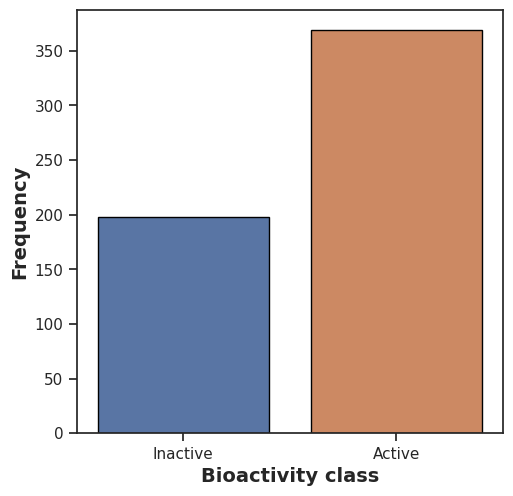

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Bioactvity Class', data=df_chemicals_pharmacokinetic_normalised_pic, edgecolor='black',hue='Bioactvity Class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

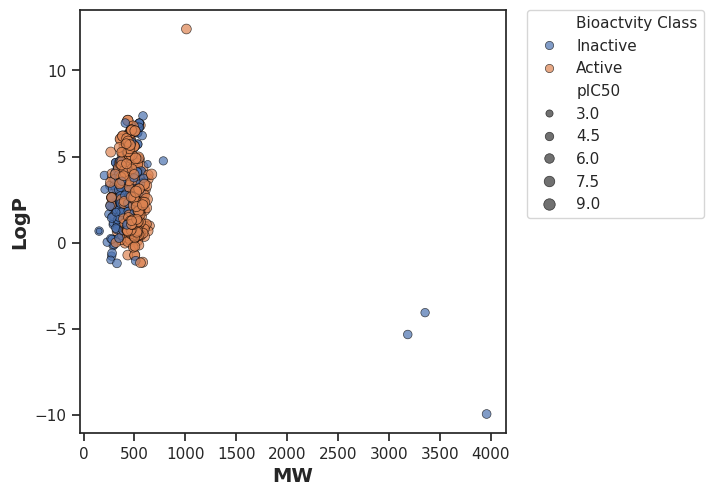

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_chemicals_pharmacokinetic_normalised_pic, hue='Bioactvity Class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

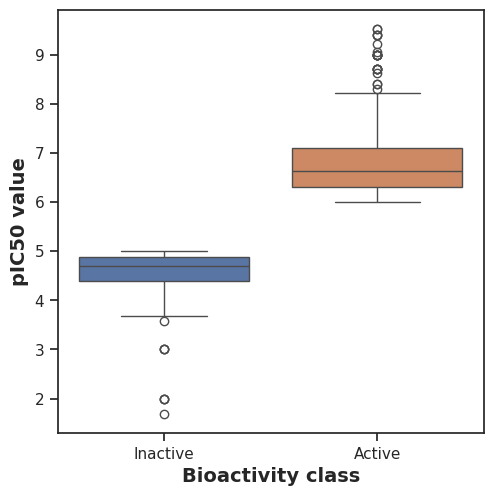

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Bioactvity Class', y = 'pIC50', hue='Bioactvity Class',data = df_chemicals_pharmacokinetic_normalised_pic)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
# Statistical analysis | Mann-Whitney U Test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Bioactvity Class']
  df = df_chemicals_pharmacokinetic_normalised_pic[selection]
  active = df[df['Bioactvity Class'] == 'Active']
  active = active[descriptor]

  selection = [descriptor, 'Bioactvity Class']
  df = df_chemicals_pharmacokinetic_normalised_pic[selection]
  inactive = df[df['Bioactvity Class'] == 'Inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,73062.0,6.437952e-86,0.05,Different distribution (reject H0)


## MOLECULAR DESCRIPTORS CALCULATION FOR DIFFERENT CHEMICALS - SUBSTRUCTURE FINGERPRINTS

In [ ]:
# PADEL Descriptors

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-05-30 12:02:50--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-05-30 12:02:50--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  54.0MB/s    in 0.5s    

2024-05-30 12:02:52 (54.0 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-05-30 12:02:52--  https://git

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df_descriptors = pd.read_csv('./TNF Chemicals pIC Values.csv')
df_descriptors.drop(['Unnamed: 0'],axis=1,inplace=True)
df_descriptors.head()

,Molecule ChEMBL ID,Smiles,Bioactvity Class,MW,LogP,HBA,HBD,pIC50
0,CHEMBL170855,CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O,Inactive,326.378,0.0657,9.0,1.0,4.000000
1,CHEMBL174253,CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O,Inactive,290.319,1.0435,6.0,0.0,4.259637
2,CHEMBL3936729,CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O,Active,331.347,2.0995,6.0,0.0,6.045757
3,CHEMBL3986932,COc1cccc2c1ncc1c(=O)n(-c3ccc4c(c3)OCO4)c(=O)n(...,Active,524.555,2.0344,10.0,0.0,8.096910
4,CHEMBL4110900,COc1cccc2c1ncc1c(=O)n(-c3cccc(Cl)c3)c(=O)n([C@...,Active,422.872,2.8970,7.0,1.0,7.508638


In [ ]:
selection = ['Smiles','Molecule ChEMBL ID','Bioactvity Class' , 'pIC50']
df_descriptors_selection = df_descriptors[selection]
df_descriptors_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCOC(=O)CCCn1c(=O)c2c(nc(S)n2C)n(C)c1=O	CHEMBL170855	Inactive	4.0
CCOC(=O)CCCn1c(=O)c2ccccc2n(C)c1=O	CHEMBL174253	Inactive	4.259637310505756
CCn1c(=O)c2cnc3c(OC)cccc3c2n(CCCF)c1=O	CHEMBL3936729	Active	6.045757490560675
COc1cccc2c1ncc1c(=O)n(-c3ccc4c(c3)OCO4)c(=O)n(C3CCN(S(C)(=O)=O)CC3)c12	CHEMBL3986932	Active	8.096910013008056
COc1cccc2c1ncc1c(=O)n(-c3cccc(Cl)c3)c(=O)n([C@@H]3CCNC3)c12	CHEMBL4110900	Active	7.508638306165727


In [ ]:
! cat molecule.smi | wc -l

567


In [ ]:
! bash padel.sh

Processing CHEMBL170855	Inactive	4.0 in molecule.smi (1/567). 
Processing CHEMBL174253	Inactive	4.259637310505756 in molecule.smi (2/567). 
Processing CHEMBL3936729	Active	6.045757490560675 in molecule.smi (3/567). 
Processing CHEMBL3986932	Active	8.096910013008056 in molecule.smi (4/567). Average speed: 2.84 s/mol.
Processing CHEMBL4110900	Active	7.508638306165727 in molecule.smi (5/567). Average speed: 1.14 s/mol.
Processing CHEMBL3639391	Inactive	1.999999956570554 in molecule.smi (7/567). Average speed: 1.03 s/mol.
Processing CHEMBL3642445	Active	6.913640169325252 in molecule.smi (6/567). Average speed: 1.02 s/mol.
Processing CHEMBL3640306	Active	6.995678626217358 in molecule.smi (8/567). Average speed: 0.78 s/mol.
Processing CHEMBL320567	Inactive	3.585026652029182 in molecule.smi (9/567). Average speed: 0.69 s/mol.
Processing CHEMBL109316	Inactive	4.221848749616356 in molecule.smi (10/567). Average speed: 0.64 s/mol.
Processing CHEMBL3740948	Inactive	5.0 in molecule.smi (11/567). A

## ML CLASSIFICATION MODEL - CHEMICAL CANDIDATE SAMPLE SPECIFIC SCREENING BASED - RANDOM FOREST CLASSIFIER TO CLASSIFY ACTIVE AND INACTIVE BIOACTIVITY WITH THE BEST CHEMICAL CANDIDATES TO FURTHER SCREEN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Load the data
df = pd.read_csv('./TNF Classification Dataset.csv')
df.head()


,Name,Result,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,CHEMBL174253,Inactive,1,0,0,0,0,0,0,0,...,0,0,7,7,6,0,0,0,0,11
1,CHEMBL170855,Inactive,1,0,0,0,0,0,0,0,...,0,0,9,9,6,0,0,0,0,9
2,CHEMBL3936729,Active,1,0,0,0,0,0,0,1,...,0,0,7,7,5,0,0,0,0,13
3,CHEMBL3986932,Active,1,0,0,0,0,0,0,0,...,0,0,11,11,3,0,0,0,0,22
4,CHEMBL4110900,Active,1,0,0,0,0,0,0,0,...,0,0,7,7,2,0,0,0,0,21


In [ ]:
# Map 'Active' to 1 and 'Inactive' to 0 in the 'Result' column
df['Result'] = df['Result'].map({'Active': 1, 'Inactive': 0})

In [ ]:
# Prepare the features and target
X = df.drop(['Name', 'Result'], axis=1)
y = df['Result']

In [ ]:
df.Result.value_counts()

Result
1    369
0    198
Name: count, dtype: int64

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y)

In [ ]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=700)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700)

In [ ]:
# Predict probabilities and classes on the test set
y_prob = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [ ]:
# Combine test data, true labels, predicted labels, and probabilities into a DataFrame
test_results = X_test.copy()
test_results['True_Label'] = y_test.values
test_results['Predicted_Label'] = y_pred
test_results['Prob_Active'] = y_prob[:, 1]  # Probability of being in the active class

# Add molecule names to the test results
test_results['Name'] = df.loc[y_test.index, 'Name'].values


In [ ]:
test_results.to_csv('Chemical screen.csv')

In [ ]:
# Filter for only active samples and sort by the highest probability of being active
best_predicted_active_samples = test_results.loc[
    (test_results['True_Label'] == 1) & (test_results['Predicted_Label'] == 1)
].sort_values(by='Prob_Active', ascending=False).head(10)

print("Best Predicted Active Samples:")
print(best_predicted_active_samples)


Best Predicted Active Samples:
     SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  SubFP7  SubFP8  SubFP9  SubFP10  \
520       0       0       0       0       0       0       0       0        0   
46        0       0       0       0       0       0       0       0        0   
522       0       0       0       0       0       0       0       0        0   
241       0       0       0       0       1       0       0       0        0   
269       1       0       0       0       0       0       0       0        0   
521       0       0       0       0       0       0       0       0        0   
48        0       0       0       0       0       0       0       0        0   
6         0       0       0       0       1       0       0       0        0   
403       1       0       0       0       1       0       0       0        0   
233       1       0       0       0       1       0       0       0        0   

     SubFP11  ...  SubFPC302  SubFPC303  SubFPC304  SubFPC305  SubFPC306  \
520        0

In [ ]:
# Interactive visualization of the best predicted active samples

import plotly.express as px
from IPython.display import display

fig = px.bar(best_predicted_active_samples, x='Name', y='Prob_Active',
             title='Top 5 Best Predicted Active Samples',
             labels={'Prob_Active': 'Probability of Being Active', 'Name': 'Name'},
             hover_data=['True_Label', 'Predicted_Label'])
fig.show()

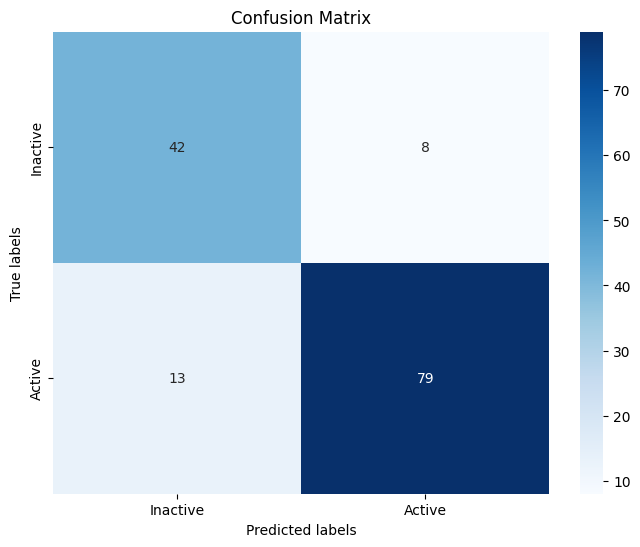

AUC-ROC Score: 0.9255434782608696


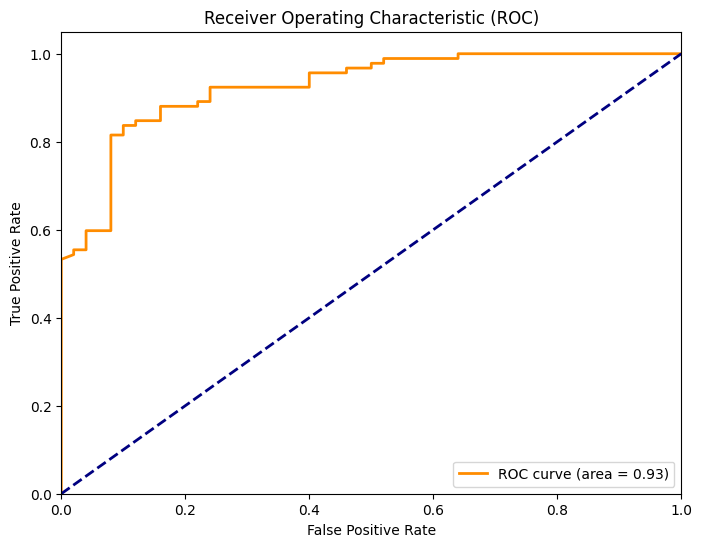

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob[:, 1])
print(f'AUC-ROC Score: {auc_roc}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


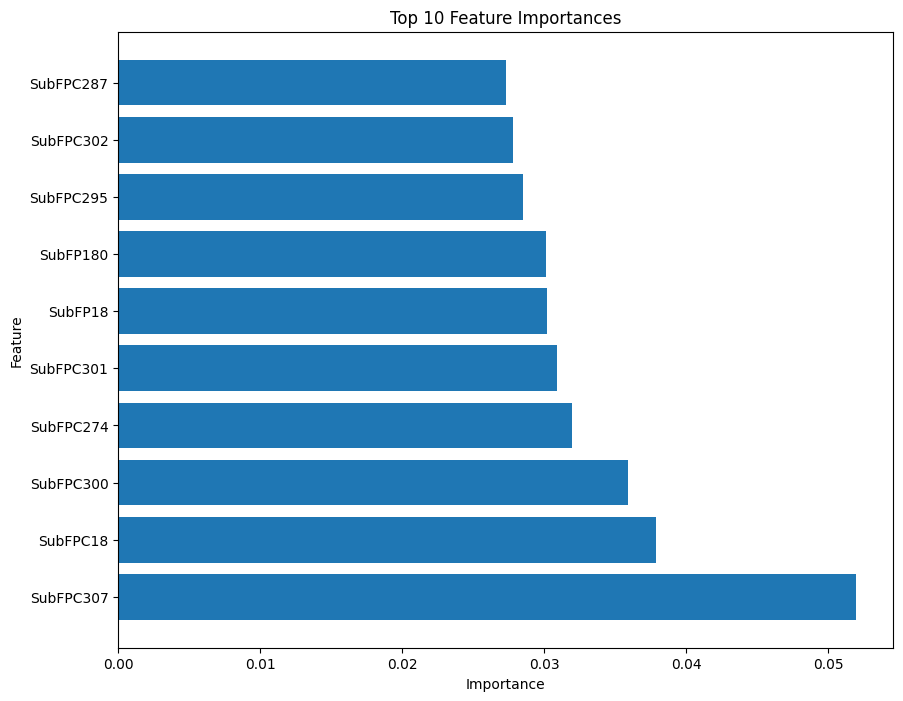

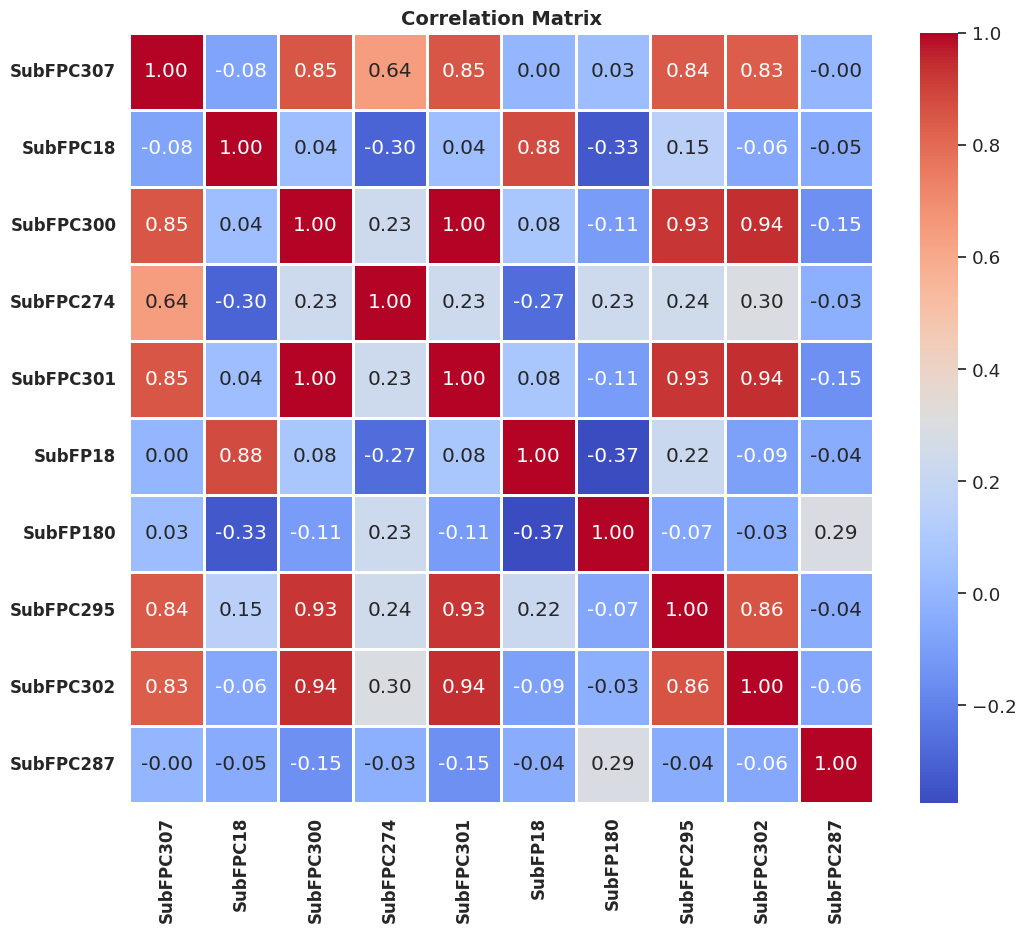

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Get the indices of the top 10 features
top_feature_indices = indices[:10]
top_feature_names = feature_names[top_feature_indices]

# Plot the top 10 feature importances horizontally
plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.barh(range(10), importances[top_feature_indices], align='center')
plt.yticks(range(10), top_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Create a DataFrame with the top 10 features and their importances
top_features_df = pd.DataFrame({
    'Feature': top_feature_names,
    'Importance': importances[top_feature_indices]
})

# Save the DataFrame to a CSV file
top_features_df.to_csv('top_features.csv', index=False)

# Create a correlation matrix for the top 10 features
top_10_data = df[top_feature_names]
correlation_matrix = top_10_data.corr()

# Create a beautiful correlation matrix plot
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor="white")

# Customize the font size and weight for legends
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Save the correlation matrix with legends in bold and proper font size
resolution_value = 300
plt.savefig("correlation_matrix_top_features.png", format="png", dpi=resolution_value)
plt.show()


<ipython-input-16-e27bf89a1071>:38: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



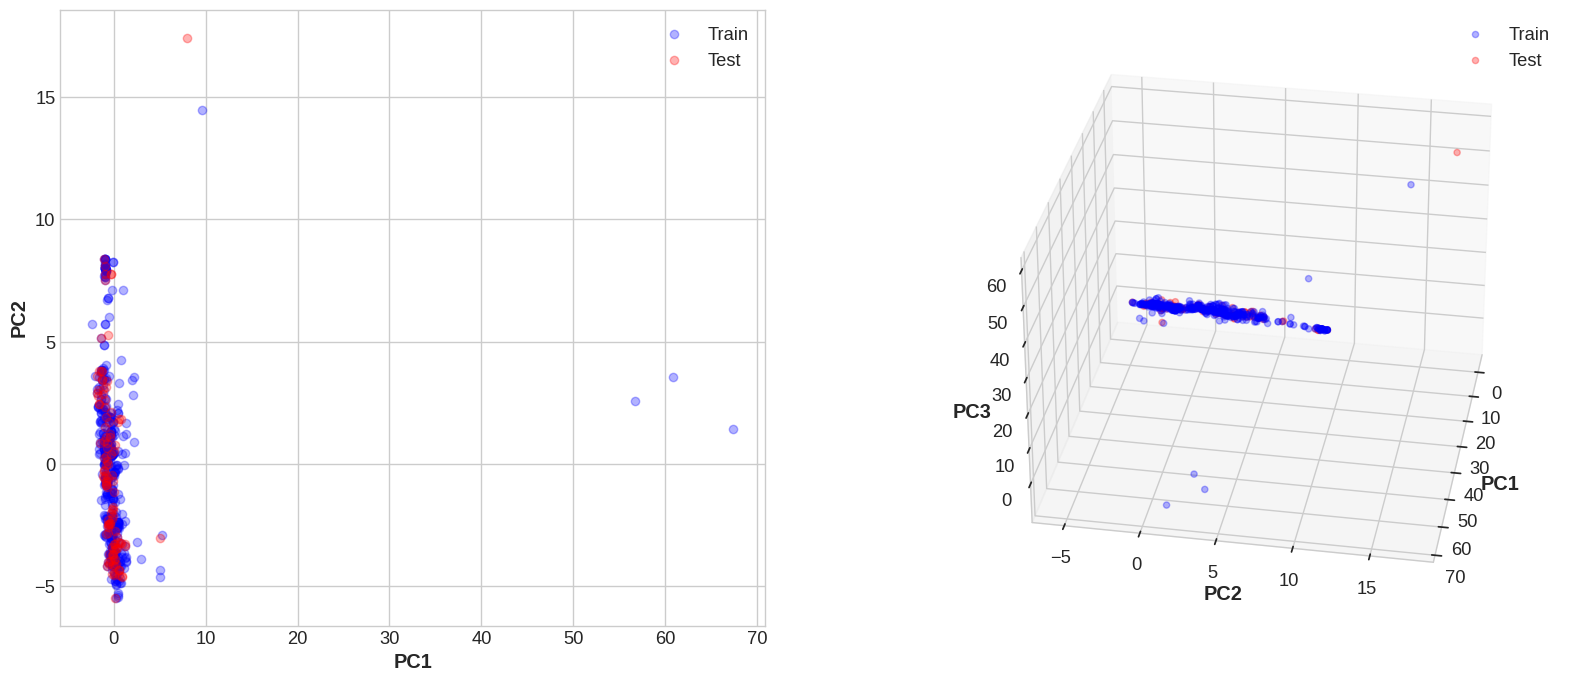

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

df_ad = pd.read_csv('./TNF Classification Dataset.csv')

# Assuming 'data' is your original dataset
X_ad = df_ad.drop(['Result','Name'], axis=1)  # Features
y_ad = df_ad['Result']  # Target variable

# Convert target variable labels to numerical format (e.g., 'active' -> 1, 'inactive' -> 0)
y_edited_ad = y_ad.replace({'Active': 1, 'Inactive': 0})
# Split the data into training and test sets
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_edited_ad, test_size=0.2, random_state=42)

def PCA_plot(X_train, X_test, y_train, y_test):
    # Combine the training and test sets for PCA analysis
    train = pd.concat([X_train, y_train], axis=1)
    test = pd.concat([X_test, y_test], axis=1)
    train['model'] = "Train"
    test['model'] = "Test"
    pca_data = pd.concat([train, test])

    # Apply Scaling
    X = pca_data.drop('model', axis=1).to_numpy().astype(float)
    y = pca_data['model'].values

    # Formatting
    target_names = ['Train', 'Test']
    colors = ['blue', 'red']
    alpha = 0.3

    # 2 Components PCA
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    X_std = StandardScaler().fit_transform(X)
    X_r = pca.fit_transform(X_std)

    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, 0], X_r[y == target_name, 1],
                    color=color, alpha=alpha, label=target_name)
    plt.xlabel("PC1", weight='bold')
    plt.ylabel("PC2", weight='bold')
    plt.legend()

    # 3 Components PCA
    ax = plt.subplot(1, 2, 2, projection='3d')
    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X_std)

    for color, target_name in zip(colors, target_names):
        ax.scatter(X_reduced[y == target_name, 0], X_reduced[y == target_name, 1], X_reduced[y == target_name, 2],
                   color=color, alpha=alpha, label=target_name)
    ax.set_xlabel("PC1", weight='bold')
    ax.set_ylabel("PC2", weight='bold')
    ax.set_zlabel("PC3", weight='bold')
    ax.view_init(30, 10)
    plt.legend()

    # Save and show the plot
    plt.savefig('applicability_domain.pdf', dpi=300)
    plt.show()

# Visualize the data using PCA_plot function
PCA_plot(X_train_ad, X_test_ad, y_train_ad, y_test_ad)
